# Principal Component Analysis
## Rrs spectra of a bloom north of Hawaii

## 1. Stream time-series of Rrs data cubes

Import the packages used in this notebook.

In [51]:
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from datetime import datetime


[back to top](#Contents)

## 2. NASA Earthdata Authentication

Make sure username and password are correct.

In [32]:
auth = earthaccess.login(persist=True)

[back to top](#Contents)

In [33]:
persist=True 

## 3. Determine time span and lat/lon boundaries

In [34]:
tspan = ("2024-07-07", "2024-08-05")
bbox = (-159, 26, -157.5, 28)
clouds = (0, 80)

[back to top](#Contents)

## 4. Stream Data


In [35]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_RRS_NRT",
    granule_name="*.DAY.*.4km.*",
    temporal=tspan,
)

The `paths` list now contains paths to actual files on the local
filesystem.

In [36]:
paths = earthaccess.open(results)
paths

QUEUEING TASKS | :   0%|          | 0/30 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/30 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/30 [00:00<?, ?it/s]

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240707.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240708.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240709.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240710.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240711.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240712.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240713.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240714.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240715.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc>,
 <File-like object S3FileSys

## 5. Nest images from different date

In [8]:
dataset = xr.open_mfdataset(paths, combine="nested", concat_dim="date")
dataset

<xarray.Dataset> Size: 824GB
Dimensions:     (date: 30, lat: 4320, lon: 8640, wavelength: 184, rgb: 3,
                 eightbitcolor: 256)
Coordinates:
  * wavelength  (wavelength) float64 1kB 339.0 341.0 344.0 ... 714.0 717.0 719.0
  * lat         (lat) float32 17kB 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon         (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: date, rgb, eightbitcolor
Data variables:
    Rrs         (date, lat, lon, wavelength) float32 824GB dask.array<chunksize=(1, 16, 1024, 8), meta=np.ndarray>
    palette     (date, rgb, eightbitcolor) uint8 23kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/64)
    product_name:                      PACE_OCI.20240707.L3m.DAY.RRS.V2_0.Rrs...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/2.0
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         3310866
    data_minimum:                      -0.0100000035
    data_maximum:                      0.099999994

## 6. Trim region of interest

In [9]:
region_trim = dataset.sel({"lon": slice(-159, -157.5), "lat": slice(28, 26)})

## 7. Calculate the spatial mean of each Rrs wavelength for each day

In [10]:
region = region_trim.mean(dim=("lon", "lat")).compute()

In [11]:
region

<xarray.Dataset> Size: 47kB
Dimensions:     (date: 30, wavelength: 184, rgb: 3, eightbitcolor: 256)
Coordinates:
  * wavelength  (wavelength) float64 1kB 339.0 341.0 344.0 ... 714.0 717.0 719.0
Dimensions without coordinates: date, rgb, eightbitcolor
Data variables:
    Rrs         (date, wavelength) float32 22kB 0.006906 0.005946 ... 0.0001137
    palette     (date, rgb, eightbitcolor) uint8 23kB 147 0 108 144 ... 0 0 0 0

## 8. Save the time series of Rrs spectra as an nc file
It takes a long time to process the spatial means, so it is better to save the file and then retrieve the file next time. 

In [12]:
#region.to_netcdf("Rrs_timeseries_Hawaii.nc")

## 9. Open the nc file (if necessary)

In [3]:
#START HERE
region = xr.open_dataset('Rrs_timeseries_Hawaii.nc')

In [4]:
region.date

<xarray.DataArray 'date' (date: 30)> Size: 240B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
Dimensions without coordinates: date

In [5]:
region.dims

FrozenMappingWarningOnValuesAccess({'date': 30, 'wavelength': 184, 'rgb': 3, 'eightbitcolor': 256})

## 10. Transform xarray in array
The array has dates as rows, wavelength as columns. 

In [6]:
region2 = region["Rrs"].values
region2

array([[ 6.90596085e-03,  5.94617100e-03,  6.39760494e-03, ...,
        -3.40451843e-05,  1.97280475e-04,  4.31546185e-04],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [ 3.20837321e-03,  1.76038081e-03,  2.01226398e-03, ...,
         1.24637445e-04,  5.62185422e-04,  9.38430254e-04],
       [ 2.49838014e-03,  2.39667622e-03,  3.21627758e-03, ...,
         2.20997608e-05,  2.36491716e-04,  4.39302210e-04],
       [ 8.96624010e-03,  7.18398346e-03,  7.00570550e-03, ...,
        -5.08454723e-05,  3.13939131e-06,  1.13716276e-04]], dtype=float32)

Check the array's dimensions.

In [7]:
region2.shape

(30, 184)

## 11. Remove NaN values
PCA will not run if NaN values are present in the array.

Remove Rrs with NaN values.

In [29]:
region3 = region2[~np.isnan(region2).any(axis=1)]

Remove dates of NaN Rrs values:
Extract the image dates from path, use NaN index to exclude dates where Rrs = NaN.

In [37]:
region_not_nan = ~np.isnan(region2).any(axis=1)
def date_from_path(p):
    # TO DO: convert to datetime
    return p.full_name.split('/')[-1].split('.')[1]

dates = [date_from_path(p) for p in paths]
# np.array(dates)[region_not_nan]
dates = [d for i, d in enumerate(dates) if i in np.where(region_not_nan)[0]]
dates

['20240707',
 '20240711',
 '20240715',
 '20240717',
 '20240718',
 '20240719',
 '20240721',
 '20240724',
 '20240725',
 '20240727',
 '20240731',
 '20240801',
 '20240802',
 '20240803',
 '20240804',
 '20240805']

## 13. Run the Principal Component Analysis

### 13.1. PCA of raw Rrs spectra

Plot Rrs spectra.

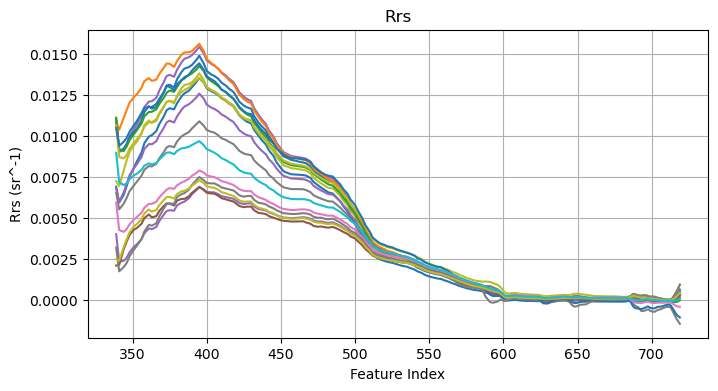

In [9]:
plt.figure(figsize=(8, 4))
for i in range(region2.shape[0]):
    plt.plot(region.wavelength, region2[i, :])
plt.title('Rrs')
plt.xlabel('Feature Index')
plt.ylabel('Rrs (sr^-1)')
#plt.legend()
plt.grid(True)
filename = 'Rrs_Hawaii_20240707_20240805.png'
plt.savefig(filename,format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

Check wavelengths.

In [10]:
region.wavelength

<xarray.DataArray 'wavelength' (wavelength: 184)> Size: 1kB
array([339., 341., 344., 346., 348., 351., 353., 356., 358., 361., 363., 366.,
       368., 371., 373., 375., 378., 380., 383., 385., 388., 390., 393., 395.,
       398., 400., 403., 405., 408., 410., 413., 415., 418., 420., 422., 425.,
       427., 430., 432., 435., 437., 440., 442., 445., 447., 450., 452., 455.,
       457., 460., 462., 465., 467., 470., 472., 475., 477., 480., 482., 485.,
       487., 490., 492., 495., 497., 500., 502., 505., 507., 510., 512., 515.,
       517., 520., 522., 525., 527., 530., 532., 535., 537., 540., 542., 545.,
       547., 550., 553., 555., 558., 560., 563., 565., 568., 570., 573., 575.,
       578., 580., 583., 586., 588., 591., 593., 596., 598., 601., 603., 605.,
       608., 610., 613., 615., 618., 620., 623., 625., 627., 630., 632., 635.,
       637., 640., 641., 642., 643., 645., 646., 647., 648., 650., 651., 652.,
       653., 655., 656., 657., 658., 660., 661., 662., 663., 665., 666., 667.,
       668., 670., 671., 672., 673., 675., 676., 677., 678., 679., 681., 682.,
       683., 684., 686., 687., 688., 689., 691., 692., 693., 694., 696., 697.,
       698., 699., 701., 702., 703., 704., 706., 707., 708., 709., 711., 712.,
       713., 714., 717., 719.])
Coordinates:
  * wavelength  (wavelength) float64 1kB 339.0 341.0 344.0 ... 714.0 717.0 719.0
Attributes:
    long_name:  wavelengths
    units:      nm
    valid_min:  0
    valid_max:  20000

## Run PCA

In [11]:
pca = PCA()
pca.fit(region3)

PCA()

## Retrieve eigenvalues and eigenvectors


In [14]:
variance = pca.explained_variance_ratio_
eigenvectors = pca.components_

eigenvalues = pca.transform(region3)

Create a DataFrame to hold the principal component scores


In [15]:
eigenvalues_df = pd.DataFrame(eigenvalues, columns=[f'PC{i+1}' for i in range(eigenvalues.shape[1])])

In [16]:
#print("Eigenvalues:")
#print(eigenvalues)
print("\nEigenvectors:")
#print(eigenvectors)
#print(variance)
print(eigenvalues_df)


Eigenvectors:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.008802 -0.005056 -0.000794  0.000211  0.001036 -0.000436 -0.000096   
1   0.022418 -0.001229  0.001094 -0.000191  0.000210  0.000002 -0.000146   
2   0.012360 -0.002036 -0.000410  0.001262 -0.001044  0.000191 -0.000191   
3   0.019174 -0.000080  0.001205  0.000298  0.000528  0.000442  0.000445   
4   0.025740  0.002238 -0.001825  0.001904 -0.000050  0.000150  0.000015   
5   0.016671  0.000777  0.000211 -0.000274  0.001237 -0.000078 -0.000171   
6   0.004491 -0.002422 -0.000515  0.000128 -0.000169 -0.000087  0.000137   
7  -0.004395 -0.000721 -0.002542 -0.002814  0.000293  0.000397 -0.000060   
8   0.013615  0.001493  0.003212  0.000287 -0.000877  0.000026 -0.000276   
9   0.018600  0.001998 -0.000792 -0.002367 -0.001519 -0.000402  0.000271   
10 -0.028777 -0.000378  0.001518 -0.000497  0.000359  0.000167  0.000150   
11 -0.028033  0.000392 -0.001835  0.001272 -0.000481  0.000105  0.000037 

Check the dimensions of the input Rrs dataset (samples vs. wavelengths).

In [17]:
region3.shape

(16, 184)

The matrix of eigenvectors must have principal components as rows and wavelengths as columns. It will show the spectral shape of each principal component. These spectral shapes will be combined (sum) with different magnitudes to result in the Rrs spectra in the input dataset.

In [18]:
eigenvectors.shape

(16, 184)

Plot eigenvectors over wavelength.  You can check the spectral shape of each principal component to look for spectral features that resemble the spectral shape of absorption or backscatter of the particular optically-active water component you are interested in (ex. pigment absorption, particulate backscatter, CDOM absorption).

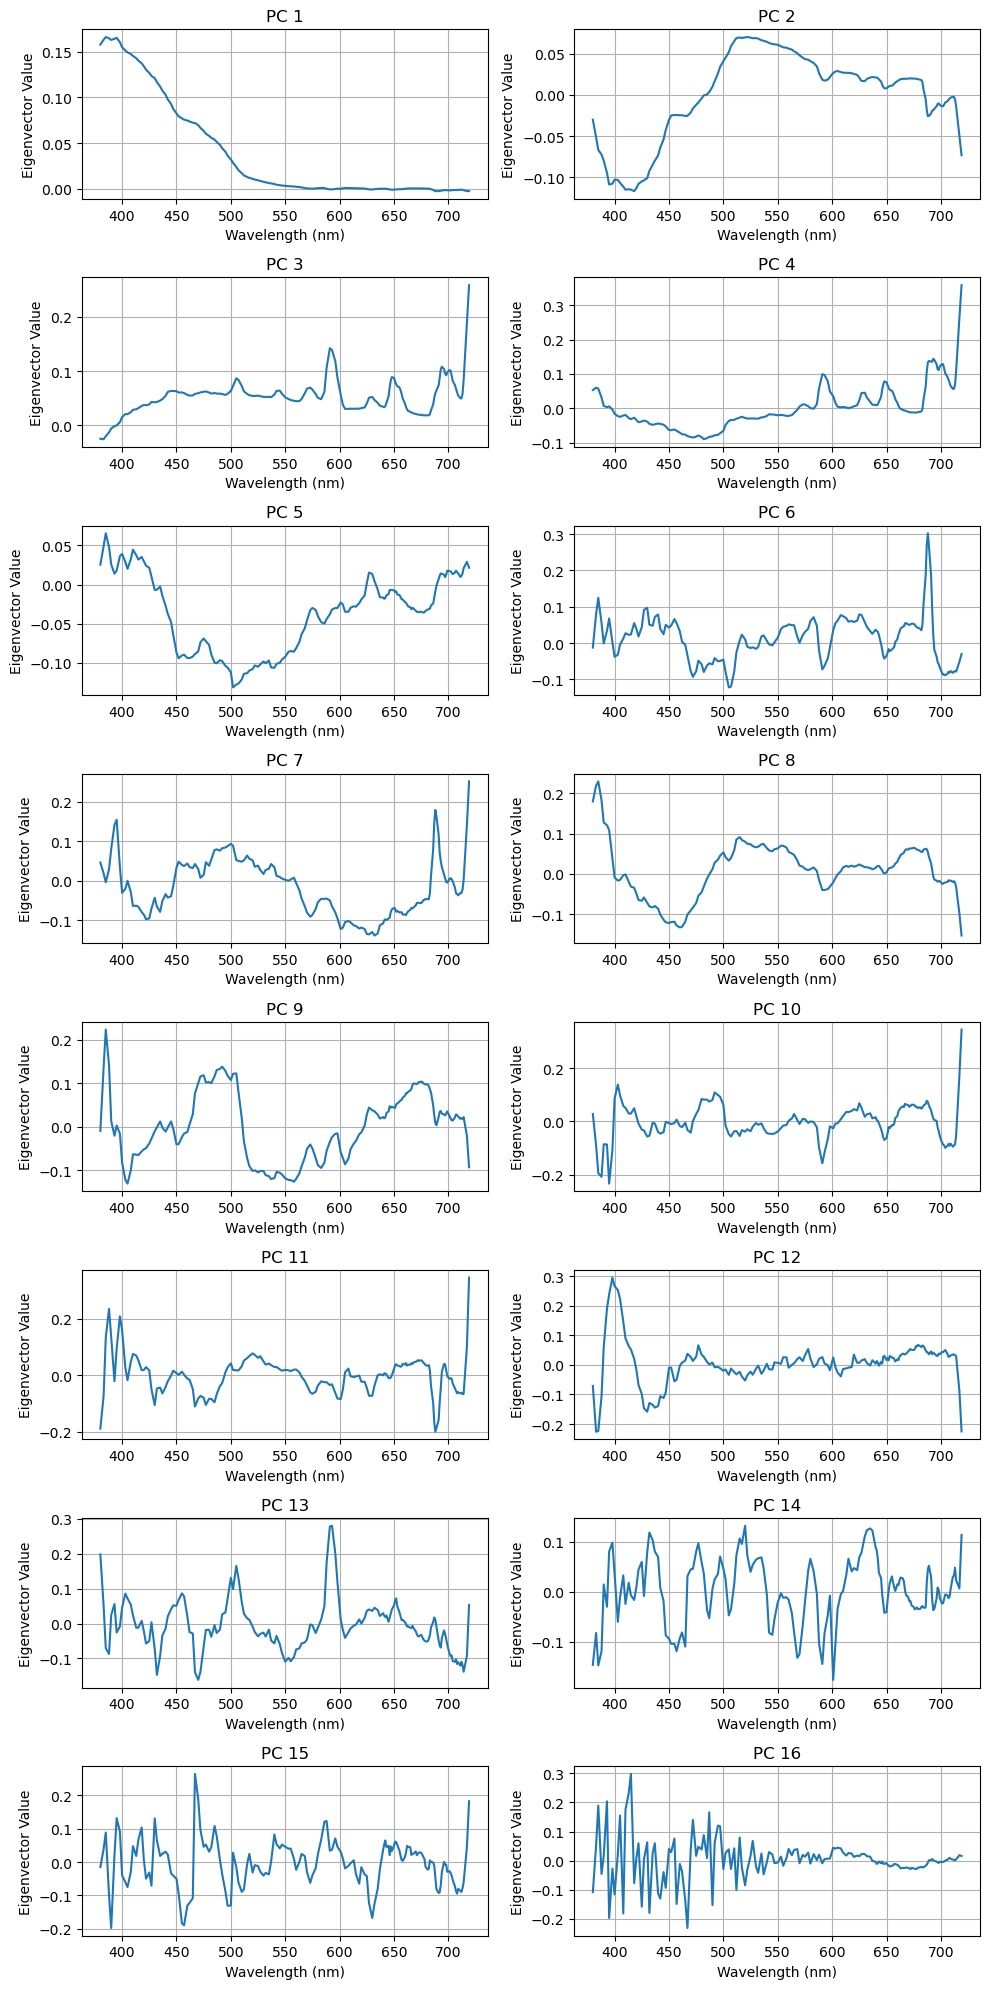

In [21]:
# Number of panels
n_panels = eigenvectors.shape[0]

# Create a figure with 8 rows and 2 columns
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 20))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each eigenvector in a subplot
for i in range(n_panels):
    ax = axes[i]
    ax.plot(region.wavelength[17:], eigenvectors[i, 17:])
    ax.set_title(f'PC {i+1}')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Eigenvector Value')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
filename = 'Rrs_eigenvectors_Hawaii_20240707_20240805.png'
plt.savefig(filename,format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()


The matrix of eigenvalues must have equal dimensions of rows and columns. It is a matrix of samples versus Principal components and it is filled with the scores (eigenvalues, e.g. intensity) of each component in that specific Rrs spectrum (sample).

In [20]:
eigenvalues_df.shape

(16, 16)

Plot the time series of eigenvalues scores. This shows how each principal component varies over time (since we are working with a time series). In case one particular principal component is related to a particular water component (e.g. PC2 has similar spectrum to the absorption by chlorophyll - or absorption by a particular phytoplankton group e.g. Prochlorococcus, or absorption by CDOM, or particulate backscatter).

Set the dates to be shown in x axis of the plot. Use list of dates with no NaN Rrs values and convert to date format. 

In [52]:
date_objects = []

# Loop through each date integer in the list
for date_int in dates:
    # Convert integer to string
    date_str = str(date_int)
    
    # Extract year, month, and day from the string
    year = int(date_str[:4])
    month = int(date_str[4:6])
    day = int(date_str[6:])
    
    # Create a datetime.date object
    date_obj = datetime(year, month, day).date()
    
    # Append the date object to the list
    date_objects.append(date_obj)

print(date_objects)

[datetime.date(2024, 7, 7), datetime.date(2024, 7, 11), datetime.date(2024, 7, 15), datetime.date(2024, 7, 17), datetime.date(2024, 7, 18), datetime.date(2024, 7, 19), datetime.date(2024, 7, 21), datetime.date(2024, 7, 24), datetime.date(2024, 7, 25), datetime.date(2024, 7, 27), datetime.date(2024, 7, 31), datetime.date(2024, 8, 1), datetime.date(2024, 8, 2), datetime.date(2024, 8, 3), datetime.date(2024, 8, 4), datetime.date(2024, 8, 5)]


Plot eigenvalues over time


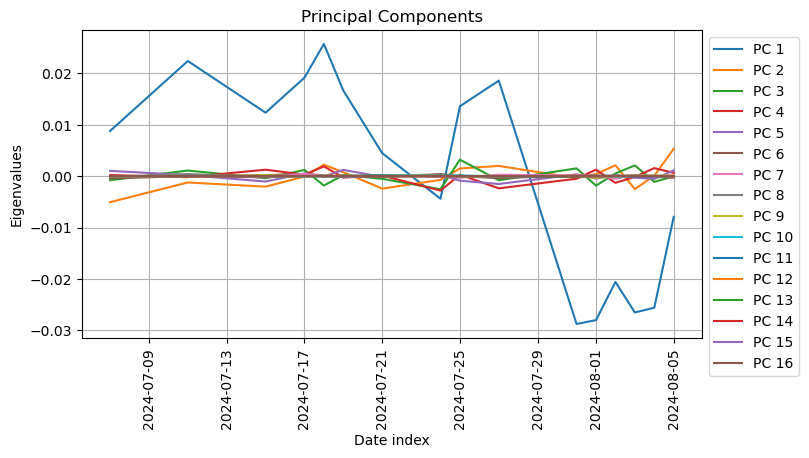

In [58]:
plt.figure(figsize=(8, 4))
for i in range(eigenvalues_df.shape[0]):
    plt.plot(date_objects, eigenvalues_df.iloc[:, i], label=f'PC {i+1}')
#    plt.plot(np.arange(1, 17), eigenvalues[:, i])
plt.title('Principal Components')
plt.xlabel('Date index')
plt.xticks(rotation=90)
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
filename = 'Rrs_eigenvalues_Hawaii_20240707_20240805.png'
plt.savefig(filename,format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

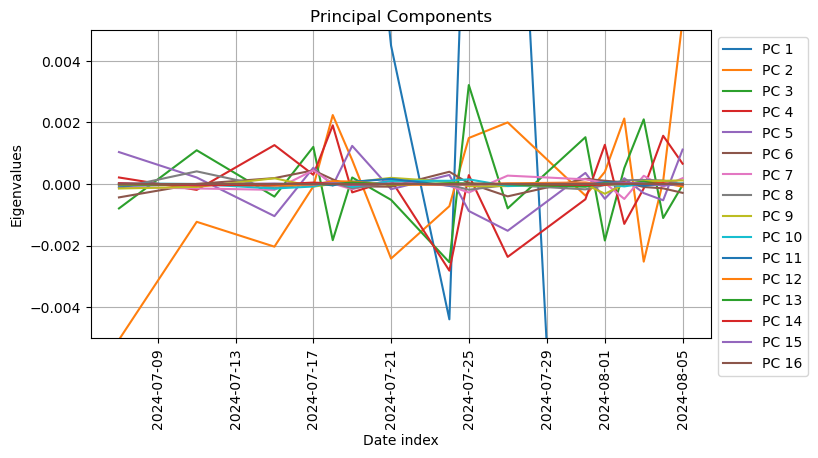

In [59]:
plt.figure(figsize=(8, 4))
for i in range(eigenvalues_df.shape[0]):
    plt.plot(date_objects, eigenvalues_df.iloc[:, i], label=f'PC {i+1}')
#    plt.plot(np.arange(1, 17), eigenvalues[:, i])
plt.title('Principal Components')
plt.xlabel('Date index')
plt.xticks(rotation=90)
plt.ylabel('Eigenvalues')
plt.ylim(-0.005, 0.005)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
filename = 'Rrs_eigenvalues_Hawaii_20240707_20240805_zoom.png'
plt.savefig(filename,format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

## 13.2. PCA of standardized Rrs spectra


Select spectral range (wavelengths 400 to 709 nm)

In [60]:
region_sliced = region.isel(wavelength=slice(25, 178))
region_sliced.dims

FrozenMappingWarningOnValuesAccess({'date': 30, 'wavelength': 153, 'rgb': 3, 'eightbitcolor': 256})

Check selected wavelengths.

In [61]:
region_sliced.wavelength

<xarray.DataArray 'wavelength' (wavelength: 153)> Size: 1kB
array([400., 403., 405., 408., 410., 413., 415., 418., 420., 422., 425., 427.,
       430., 432., 435., 437., 440., 442., 445., 447., 450., 452., 455., 457.,
       460., 462., 465., 467., 470., 472., 475., 477., 480., 482., 485., 487.,
       490., 492., 495., 497., 500., 502., 505., 507., 510., 512., 515., 517.,
       520., 522., 525., 527., 530., 532., 535., 537., 540., 542., 545., 547.,
       550., 553., 555., 558., 560., 563., 565., 568., 570., 573., 575., 578.,
       580., 583., 586., 588., 591., 593., 596., 598., 601., 603., 605., 608.,
       610., 613., 615., 618., 620., 623., 625., 627., 630., 632., 635., 637.,
       640., 641., 642., 643., 645., 646., 647., 648., 650., 651., 652., 653.,
       655., 656., 657., 658., 660., 661., 662., 663., 665., 666., 667., 668.,
       670., 671., 672., 673., 675., 676., 677., 678., 679., 681., 682., 683.,
       684., 686., 687., 688., 689., 691., 692., 693., 694., 696., 697., 698.,
       699., 701., 702., 703., 704., 706., 707., 708., 709.])
Coordinates:
  * wavelength  (wavelength) float64 1kB 400.0 403.0 405.0 ... 707.0 708.0 709.0
Attributes:
    long_name:  wavelengths
    units:      nm
    valid_min:  0
    valid_max:  20000

Transform xarray in array, then remove NaN data.

In [62]:
region2s = region_sliced["Rrs"].values
region3s = region2s[~np.isnan(region2s).any(axis=1)]

## Standardize Rrs spectra

In [63]:
# Create copies of Rrs dataset
RrsMa = np.copy(region3s)
region3_standardized = np.copy(region3s)

# Number of samples and wavelengths
num_samples, num_wavelengths = region3s.shape

# Standardize each Rrs spectrum
for i in range(num_samples):
    # Compute mean and standard deviation for the first 7 wavelengths
    mean_val = np.mean(region3s[i, ])
    sd_val = np.std(region3s[i, ])
    
    # Update RrsMa and RrsMn
    RrsMa[i, ] = region3s[i, ] - mean_val
    region3_standardized[i, ] = RrsMa[i, ] / sd_val

# Optionally, remove RrsMa if not needed
del RrsMa

# Output RrsMn or proceed with further analysis
print(region3_standardized)

[[ 2.5433486   2.4986033   2.4780564  ... -0.70913166 -0.71040416
  -0.7106727 ]
 [ 2.5476856   2.5004025   2.4758763  ... -0.75332916 -0.7550233
  -0.7550343 ]
 [ 2.5014703   2.453859    2.437202   ... -0.7570133  -0.7595698
  -0.76097304]
 ...
 [ 2.143089    2.1330664   2.1349134  ... -0.83823884 -0.8468562
  -0.85315347]
 [ 2.2000136   2.1684756   2.1627183  ... -0.8538597  -0.85819626
  -0.86147034]
 [ 2.343214    2.2992792   2.2717547  ... -0.84357053 -0.84495443
  -0.84510416]]


Plot standardized Rrs spectra.

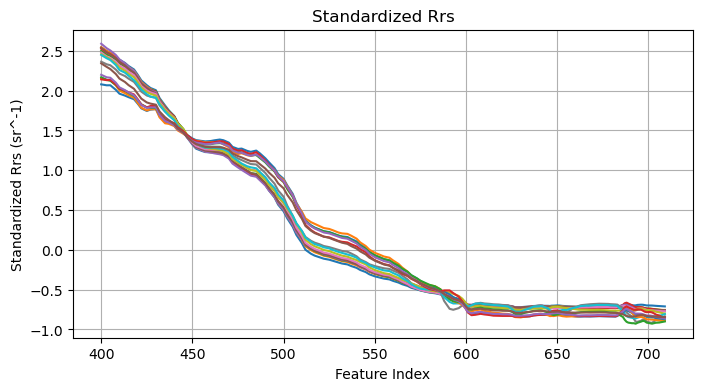

In [64]:
plt.figure(figsize=(8, 4))
for i in range(region3_standardized.shape[0]):
    plt.plot(region_sliced.wavelength, region3_standardized[i, :])
plt.title('Standardized Rrs')
plt.xlabel('Feature Index')
plt.ylabel('Standardized Rrs (sr^-1)')
filename = 'Rrsstd_Hawaii_20240707_20240805.png'
plt.savefig(filename,format = 'png', bbox_inches = 'tight', dpi = 300)
plt.grid(True)
plt.show()

## Run PCA

In [65]:
pca2 = PCA()
pca2.fit(region3_standardized)

PCA()

Retrieve eigenvalues and eigenvectors

In [66]:
variance2 = pca2.explained_variance_ratio_
eigenvectors2 = pca2.components_
eigenvalues2 = pca2.transform(region3_standardized)
eigenvalues2_df = pd.DataFrame(eigenvalues2, columns=[f'PC{i+1}' for i in range(eigenvalues2.shape[1])])

Plot the spectral distribution of eigenvectors.

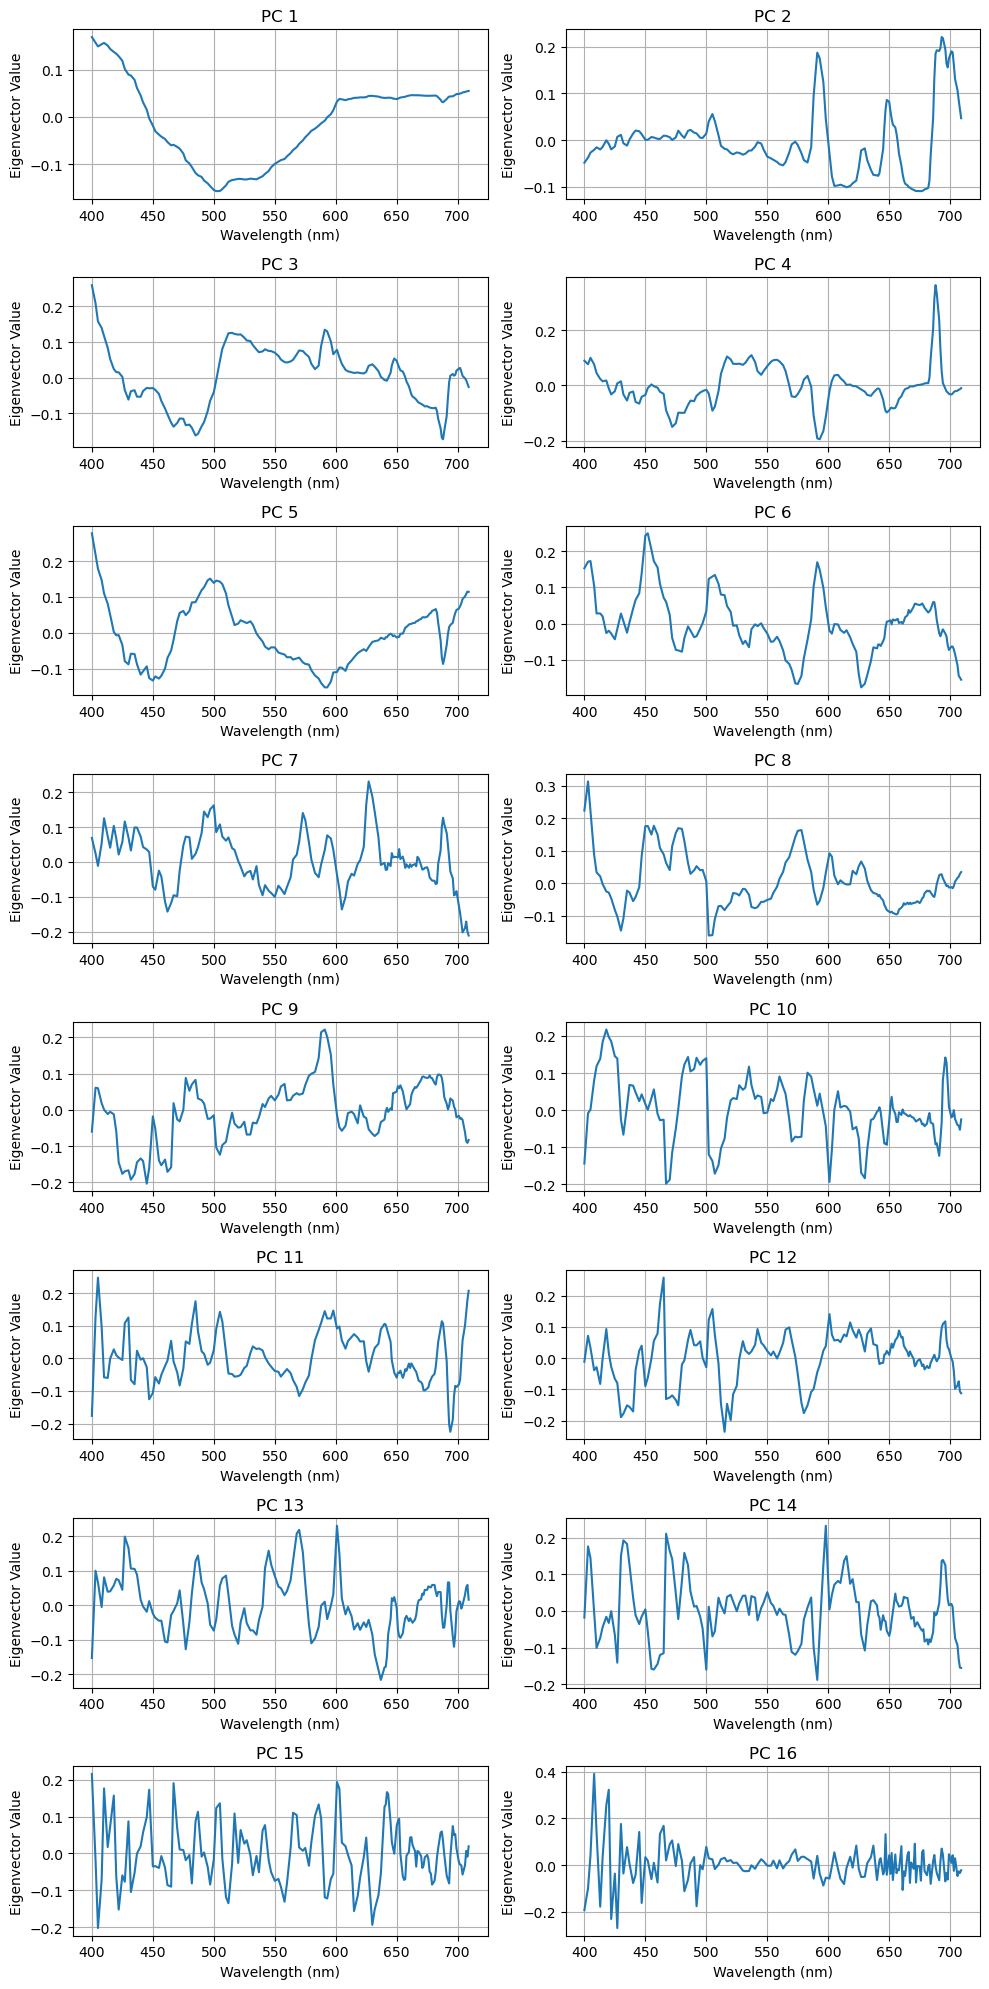

In [67]:
# Number of panels
n_panels = eigenvectors2.shape[0]

# Create a figure with 8 rows and 2 columns
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 20))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each eigenvector in a subplot
for i in range(n_panels):
    ax = axes[i]
    ax.plot(region_sliced.wavelength, eigenvectors2[i, ])
    ax.set_title(f'PC {i+1}')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Eigenvector Value')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
filename = 'Rrsstd_eigenvectors_Hawaii_20240707_20240805.png'
plt.savefig(filename,format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()


Plot variation of eigenvalues (scores) of each PC over time.

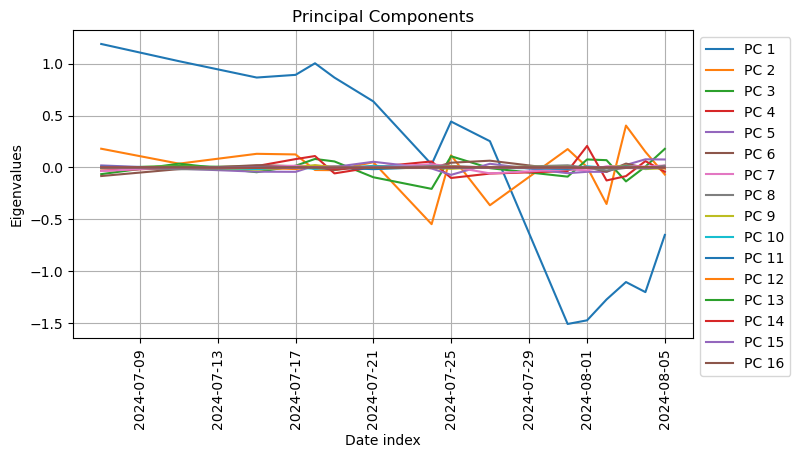

In [70]:
plt.figure(figsize=(8, 4))
for i in range(eigenvalues2_df.shape[0]):
    plt.plot(date_objects, eigenvalues2_df.iloc[:, i], label=f'PC {i+1}')
plt.title('Principal Components')
plt.xlabel('Date index')
plt.xticks(rotation=90)
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
filename = 'Rrsstd_eigenvalues_Hawaii_20240707_20240805.png'
plt.savefig(filename,format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

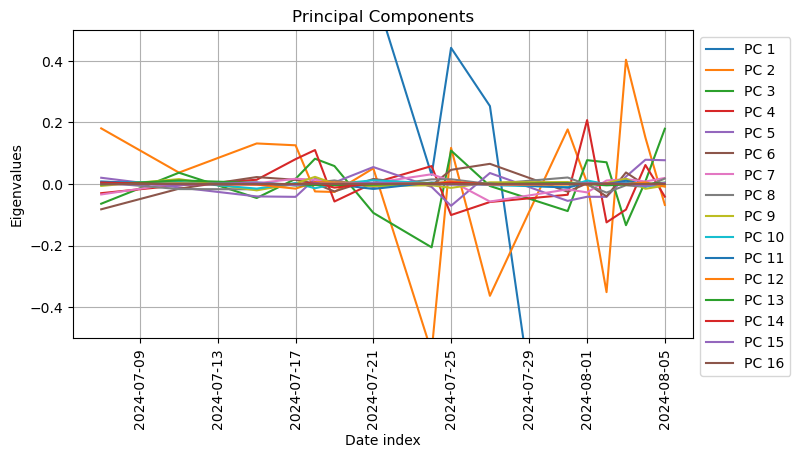

In [72]:
plt.figure(figsize=(8, 4))
for i in range(eigenvalues2_df.shape[0]):
    plt.plot(date_objects, eigenvalues2_df.iloc[:, i], label=f'PC {i+1}')
plt.title('Principal Components')
plt.xlabel('Date index')
plt.xticks(rotation=90)
plt.ylabel('Eigenvalues')
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
filename = 'Rrsstd_eigenvalues_Hawaii_20240707_20240805_zoom.png'
plt.savefig(filename,format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()